Features : Technical indicators and historical data

In [0]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,10

In [0]:
df=pd.read_csv("final.csv")
df=df[df['comp']=='HDFC Bank']
df

In [0]:
df['adj'] = df[['adj_close']].shift(+1)
df

In [0]:
X=df[['adj']]
y=df['adj_close']
y=np.asarray(y)

In [0]:
X_train=X[1:int(0.8*len(X))]
X_train_date=df['date'][1:int(0.8*len(X))]
X_test=X[int(0.8*len(X)):]
X_test_date=df['date'][int(0.8*len(X)):]
y_train=y[1:int(0.8*len(y))]
y_test=y[int(0.8*len(y)):]

In [0]:
X_test

In [294]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [295]:
preds = model.predict(X_test)
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rms

22.415770172865845

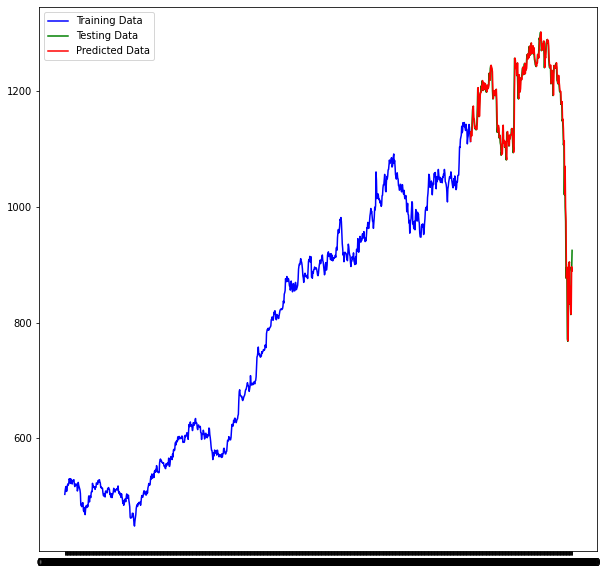

In [296]:
plt.plot(X_train_date,y_train, 'blue', label='Training Data')
plt.plot(X_test_date,y_test, 'green', label='Testing Data')
plt.plot(X_test_date,preds, 'red', label='Predicted Data')
plt.legend()
plt.show()